In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import importlib

In [12]:
# for debug
import jpeg_table
importlib.reload(jpeg_table)

# テーブル読み込み
TBL_L_Q = jpeg_table.table_luminance_quantization
TBL_C_Q = jpeg_table.table_chrominance_quantization
TBL_L_DC = jpeg_table.table_luminance_dc
TBL_C_DC = jpeg_table.table_chrominance_dc
TBL_L_AC = jpeg_table.table_luminance_dc
TBL_C_AC = jpeg_table.table_chrominance_ac
TBL_DCT = jpeg_table.table_dct
TBL_IDCT = jpeg_table.table_idct

In [21]:
def dct(src):
    w = src.shape[1]
    h = src.shape[0]
    assert(w % 8 == 0)
    assert(h % 8 == 0)
    dst = np.zeros((h, w, 3))
    for c in range(3):
        for yi in range(0, h, 8):
            for xi in range(0, w, 8):
                for v in range(8):
                    for u in range(8):
                        dst[v+yi, u+xi, c] = np.sum(src[yi:yi+8, xi:xi+8, c] * TBL_DCT[v, u])
    return dst

def idct(src):
    w = src.shape[1]
    h = src.shape[0]
    assert(w % 8 == 0)
    assert(h % 8 == 0)
    dst = np.zeros((h, w, 3))
    for c in range(3):
        for yi in range(0, h, 8):
            for xi in range(0, w, 8):
                for y in range(8):
                    for x in range(8):
                        dst[y+yi, x+xi, c] = np.sum(src[yi:yi+8, xi:xi+8, c] * TBL_IDCT[y, x])
#   dst = np.clip(dst, 0, 255)
#   dst = np.round(dst).astype(np.uint8)
    return dst

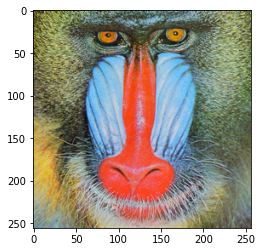

In [22]:
img_src = cv2.imread("Mandrill.bmp")
plt.imshow(img_src[:,:,::-1])

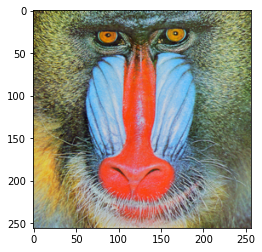

In [26]:
# dct
img_dct = dct(img_src.astype(np.int32) - 128)

# test
if True:
    # 戻るかチェック
    tmp = np.clip(idct(img_dct) + 128, 0, 255).astype(np.uint8)
    plt.imshow(tmp[:,:,::-1])

In [27]:
print(np.max(F))
print(np.min(F))

1989.9999999999998
-617.4218631564169


In [335]:
#F = np.clip(F, -617.4219, 1990.0)
#F = np.round(F)
F = F.astype(np.int32)

#F = np.clip(F, -1000, 1990.0)
#Q = 100
#F //= Q
#F *= Q
#F //= Qy_table

#F = F.astype(np.float64)

H, W, _ = F.shape
for c in range(channel):
    for yi in range(0, H, T):
        for xi in range(0, W, T):
            F[yi:yi+8, xi:xi+8, c] //= Qy_table
            F[yi:yi+8, xi:xi+8, c] *= Qy_table

In [336]:
F.shape

(256, 256, 3)

In [337]:
# IDCT
out = idct(F)

In [338]:
out += 128
out = np.clip(out, 0, 255).astype(np.uint8)

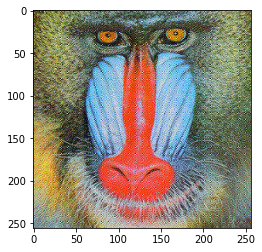

In [339]:
plt.imshow(out[:,:,::-1])